In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

In [2]:
from integrals import *
from scipy.optimize import fmin, minimize_scalar, minimize, root_scalar

In [3]:
p = 5
n_points_m = 1_000
n_points_T = 10

T_kauz, T_dyn = 0.60695, 0.7001

In [4]:
Teqs = np.hstack((np.linspace(T_kauz, T_dyn, n_points_T - 1), np.array([(n_points_T * T_dyn -T_kauz) / (n_points_T - 1),])))

es = -1 / (2 * Teqs)

In [5]:
ms = np.linspace(0.0, 0.99, n_points_m)

data = observables((len(Teqs), n_points_m))

for jdx, e in enumerate(tqdm(es)):
    for idx, m in enumerate(ms):
        h, q = fixed_points_h_q(m, e, p)

        data['q'][jdx, idx] = q
        data['h'][jdx, idx] = h
        data['T'][jdx, idx] = 1 / beta_q_e(q, m, e, p)
        data['delta_f'][jdx, idx] = deltaf_FP(m, q, h, p, e)
        data['s'][jdx, idx] = s_FP(m, q, h, p, e)
        data['dAT'][jdx, idx] = dAT_condition(
            q, m, h, beta_q_e(q, m, e, p), beta_q_e(q, m, e, p) / 2, p
        )

s_anneald = np.empty((len(Teqs), n_points_m))
for jdx, e in enumerate(tqdm(es)):
    for idx, m in enumerate(ms):
        s_anneald[jdx, idx] = annealed_entropy(m, e, p)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

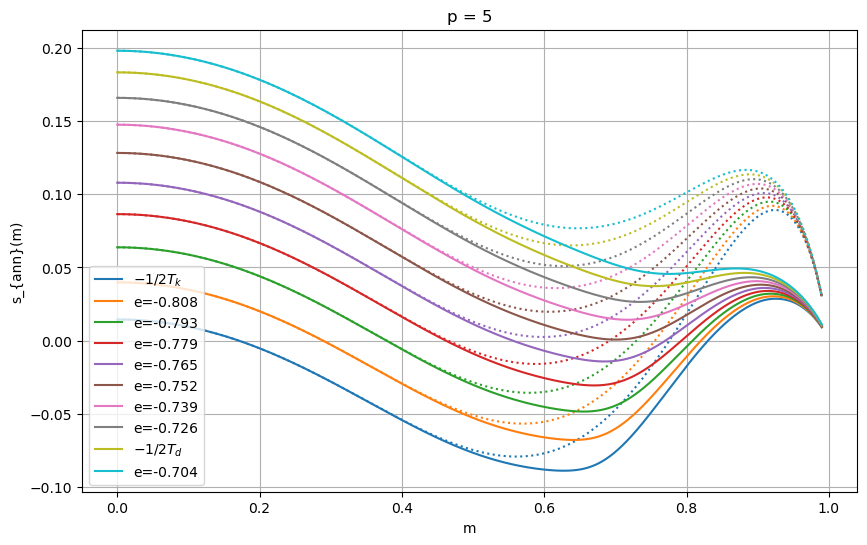

In [9]:
plt.figure(figsize=(10,6))
plt.title(f"p = {p:d}")
for i, e in enumerate(es):
    legend_name = f'e={e:.3f}'
    if i == 0:
        legend_name = r'$- 1/2T_k$'
    if i == len(es) - 2:
        legend_name = r'$ - 1/2T_d$'

    plt.plot(ms, s_anneald[i], ':', color=f'C{i}')
    plt.plot(ms, data['s'][i], label=legend_name, color=f'C{i}')
plt.xlabel('m')
plt.ylabel(r's_{ann}(m)')
plt.legend()
plt.grid()

plt.savefig(f"./annealed_vs_RS_p{p:d}.png")

## Other stuff

In [41]:
blend = 0.8
p_value = 3
ms = np.linspace(0.001, 0.999, 5_000)

#Ts = np.linspace(0.65138, 0.65139, 10)
Ts = np.linspace(0.63, 0.69, 10)
qs = np.empty((len(Ts), len(ms)))
hs = np.empty((len(Ts), len(ms)))
deltafs = np.empty((len(Ts), len(ms)))
fs = np.empty((len(Ts), len(ms)))

for jdx, T in enumerate(tqdm(Ts)):
    J0 = 1 / (2 * T)
    q_init = 0.8
    for idx, m in enumerate(ms):
        err = 1
        q = q_init
        while err > 1e-7:
            q_new = compute_q_standard(m, q, p_value, 1 / T, J0)

            err = abs(q_new - q)
            q = blend * q + (1 - blend) * q_new
            
        q_init = q

        qs[jdx, idx] = q
        fs[jdx, idx] = compute_free_energy_standard(m, q, p_value, 1 / T, J0)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p_value:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.xlim(0.78,0.85)
plt.ylim(-0.000005, 0.000005)

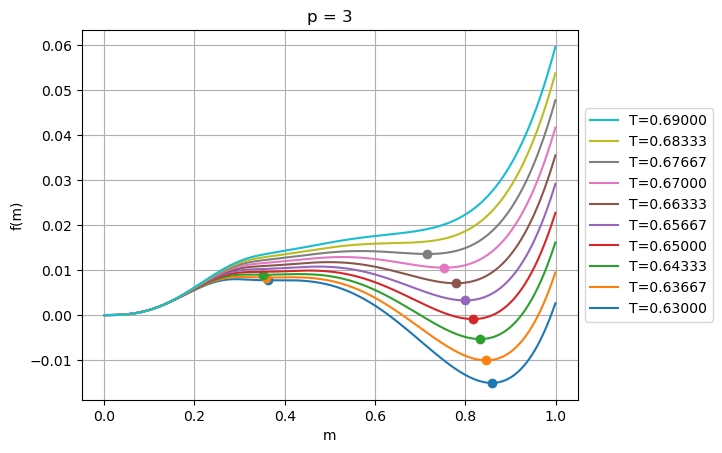

In [42]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p_value:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
#plt.xlim(0.78,0.85)
#plt.ylim(-0.000005, 0.000005)

In [12]:
Ts

array([0.65138   , 0.65138111, 0.65138222, 0.65138333, 0.65138444,
       0.65138556, 0.65138667, 0.65138778, 0.65138889, 0.65139   ])

$T_k = 0.651385$

## $p=4$

In [43]:
blend = 0.8
p_value = 4
ms = np.linspace(0.001, 0.999, 5_000)

#Ts = np.linspace(0.61685, 0.6169, 10)
Ts = np.linspace(0.6, 0.7, 10)
qs = np.empty((len(Ts), len(ms)))
hs = np.empty((len(Ts), len(ms)))
deltafs = np.empty((len(Ts), len(ms)))
fs = np.empty((len(Ts), len(ms)))

for jdx, T in enumerate(tqdm(Ts)):
    J0 = 1 / (2 * T)
    q_init = 0.8
    for idx, m in enumerate(ms):
        err = 1
        q = q_init
        while err > 1e-7:
            q_new = compute_q_standard(m, q, p_value, 1 / T, J0)

            err = abs(q_new - q)
            q = blend * q + (1 - blend) * q_new
            
        q_init = q

        qs[jdx, idx] = q
        fs[jdx, idx] = compute_free_energy_standard(m, q, p_value, 1 / T, J0)

  0%|          | 0/10 [00:00<?, ?it/s]

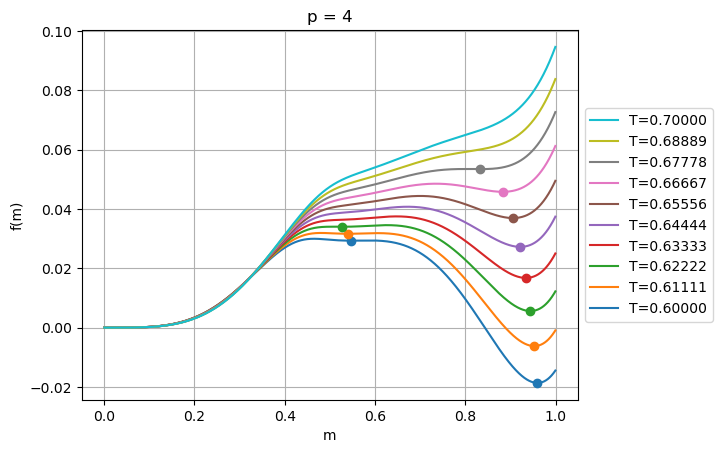

In [44]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p_value:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

#plt.xlim(0.9,1.)
#plt.ylim(-0.00001, 0.00001)

In [23]:
Ts

array([0.61685   , 0.61685556, 0.61686111, 0.61686667, 0.61687222,
       0.61687778, 0.61688333, 0.61688889, 0.61689444, 0.6169    ])

$T_k = 0.616883$

## $p=5$

In [45]:
blend = 0.8
p_value = 5
ms = np.linspace(0.001, 0.999, 5_000)

#Ts = np.linspace(0.60693, 0.60696, 10)
Ts = np.linspace(0.6, 0.72, 10)
qs = np.empty((len(Ts), len(ms)))
hs = np.empty((len(Ts), len(ms)))
deltafs = np.empty((len(Ts), len(ms)))
fs = np.empty((len(Ts), len(ms)))

for jdx, T in enumerate(tqdm(Ts)):
    J0 = 1 / (2 * T)
    q_init = 0.8
    for idx, m in enumerate(ms):
        err = 1
        q = q_init
        while err > 1e-7:
            q_new = compute_q_standard(m, q, p_value, 1 / T, J0)

            err = abs(q_new - q)
            q = blend * q + (1 - blend) * q_new
            
        q_init = q

        qs[jdx, idx] = q
        fs[jdx, idx] = compute_free_energy_standard(m, q, p_value, 1 / T, J0)

  0%|          | 0/10 [00:00<?, ?it/s]

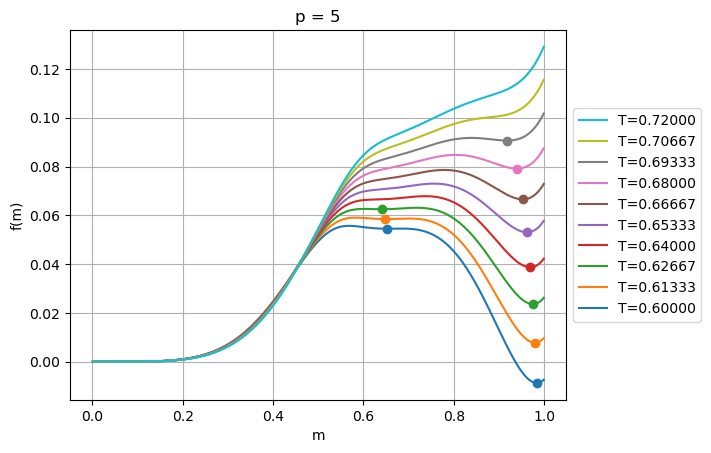

In [46]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p_value:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

#plt.xlim(0.97,0.99)
#plt.ylim(-0.00002, 0.00002)

In [31]:
Ts

array([0.60693   , 0.60693333, 0.60693667, 0.60694   , 0.60694333,
       0.60694667, 0.60695   , 0.60695333, 0.60695667, 0.60696   ])

$T_k = 0.60695$

### $T_d$

In [38]:
blend = 0.8
p_value = 5
ms = np.linspace(0.001, 0.999, 5_000)

Ts = np.linspace(0.6995, 0.7004, 10)
qs = np.empty((len(Ts), len(ms)))
hs = np.empty((len(Ts), len(ms)))
deltafs = np.empty((len(Ts), len(ms)))
fs = np.empty((len(Ts), len(ms)))

for jdx, T in enumerate(tqdm(Ts)):
    J0 = 1 / (2 * T)
    q_init = 0.8
    for idx, m in enumerate(ms):
        err = 1
        q = q_init
        while err > 1e-7:
            q_new = compute_q_standard(m, q, p_value, 1 / T, J0)

            err = abs(q_new - q)
            q = blend * q + (1 - blend) * q_new
            
        q_init = q

        qs[jdx, idx] = q
        fs[jdx, idx] = compute_free_energy_standard(m, q, p_value, 1 / T, J0)

  0%|          | 0/10 [00:00<?, ?it/s]

(0.095, 0.0962)

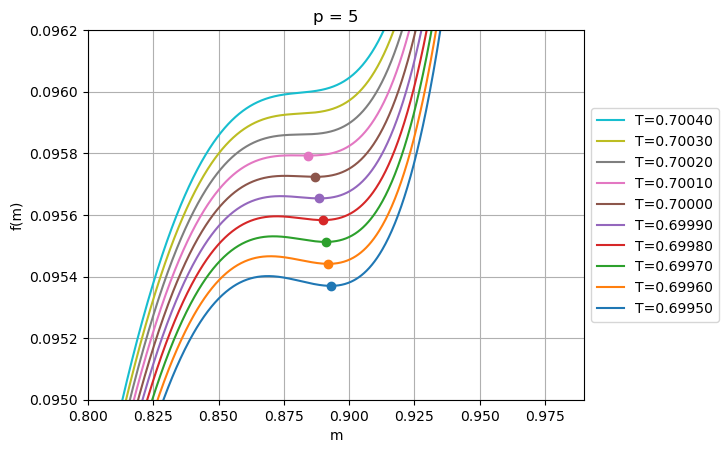

In [40]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p_value:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

plt.xlim(0.8,0.99)
plt.ylim(0.095, 0.0962)

$T_d = 0.7001$